In [3]:
%matplotlib inline
import os
import glob
import csv
import time
import pandas as pd
from   pylab import *
import datetime
import numpy as np
import sys
import math
from   operator import truediv
from   pandas.io.json import json_normalize
import _pickle as cPickle
from   random import *
import scipy.stats
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("paper")
%matplotlib inline
import scipy as sp
import pandas as pd
from matplotlib.pyplot import cm


In [2]:
 
TSS = cPickle.load(open( "ThalamusStateSpace.p", "rb" ) )
TSS.shape

(3000,)

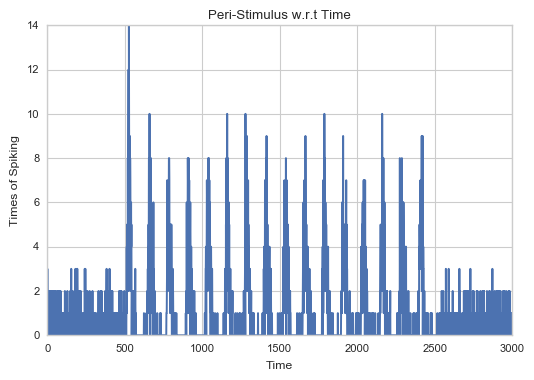

In [3]:
plt.plot(TSS)
plt.title('Peri-Stimulus w.r.t Time')
plt.ylabel('Times of Spiking')
plt.xlabel('Time')
plt.show()

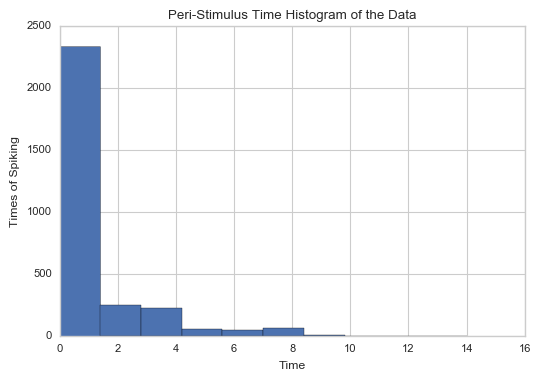

In [4]:
plt.hist(TSS)
plt.title('Peri-Stimulus Time Histogram of the Data')
plt.ylabel('Times of Spiking')
plt.xlabel('Time')
plt.show()

<font color = "blue">
#### Binomial distribution is the probabilistic model that underlies the PSTH because it shows the discrete probability distribution of the number of successes (spiking) in a sequence of 50 independent experiments

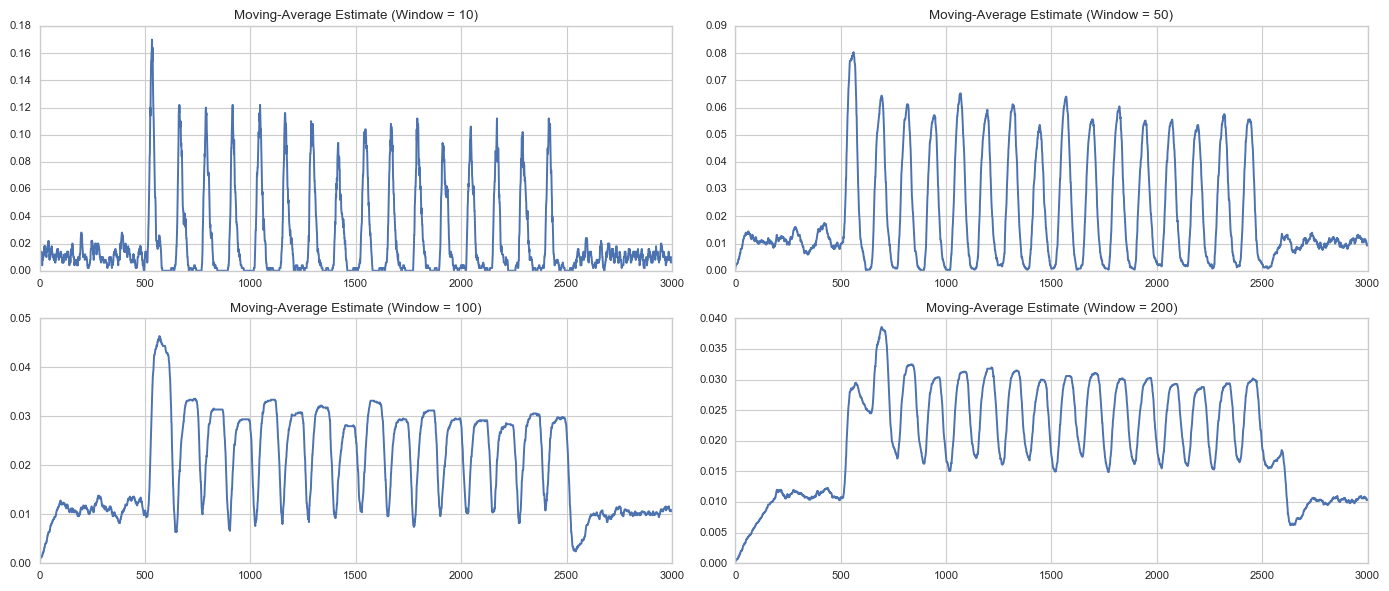

In [5]:
# Your code here

from scipy import signal
W = np.array([10,50,100,200])
results = np.zeros([4,3000])
for i in range(4):
    b = np.ones(W[i]) 
    results[i,:] = signal.lfilter(b, 1, TSS)/(50*W[i])

fig, axes = plt.subplots(2, 2, figsize=(14,6))
axes = axes.ravel()
for i in range(4):   
    axes[i].plot(results[i])
    axes[i].set_title('Moving-Average Estimate (Window = %d)'%W[i])
plt.tight_layout()


<font color = "blue">
#### When the window size is increasing (sample size becomes larger), the moving-average estimate become smoother

In [8]:
def binary_filter(y, x0, sig0, N, sigma2):
    '''
    A binary filter that takes
    y - data
    x0 - initial condition on mean
    sig0 - initial condition on varianace
    N - number of samples in data
    sigma2 - parameter sigma^2
    and outputs the filtered estimate p_t|t
    '''
    x10 = x0
    sig10 = sig0 + sigma2
    p10 = np.exp(x10)/(1. + np.exp(x10))
    n = len(y)
    sig = np.zeros(n)
    x = np.zeros(n)
    p = np.zeros(n)
    for t in range(n):
        
        sig[t] = 1./(1/sig10 + N*p10*(1-p10))
        x[t] = x10 + sig[t]*(y[t]-N*p10)
        p[t] = np.exp(x[t])/(1. + np.exp(x[t]))
        x10 = x[t]
        sig10 = sig[t] + sigma2
        p10 = np.exp(x10)/(1. + np.exp(x10))
    return p,x,sig

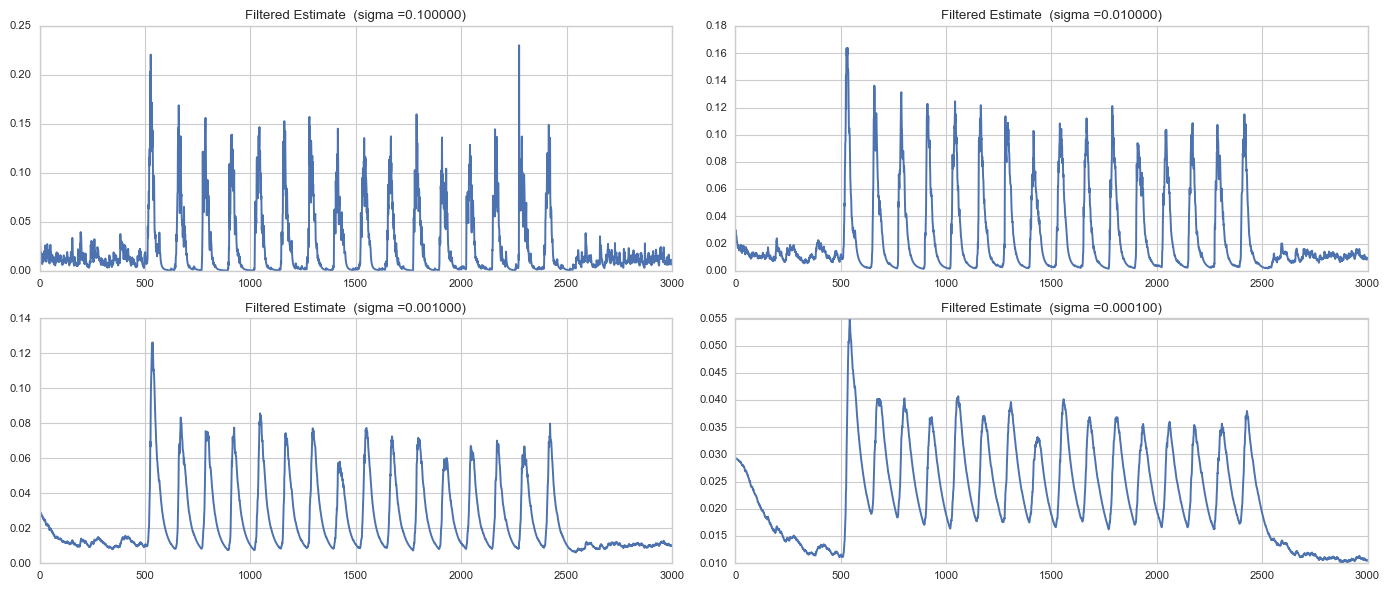

In [19]:
sigma2 = np.array([0.1, 0.01, 0.001, 0.0001])
fig, axes = plt.subplots(2, 2, figsize=(14,6))
axes = axes.ravel()
n = 0
for i in range(4):  
    r = binary_filter(TSS, -3.5, 0, 50, sigma2[i])
    axes[i].plot(r[0])
    axes[i].set_title('Filtered Estimate  (sigma =%4f)'%sigma2[i])
plt.tight_layout()

<font color = "blue">
#### When the sigma is decreasing, the moving-average estimate will become smoother


In [4]:
# load data
filename = 'realDonaldTrump_2016-01-01_2017-02-01.p'
username = filename.split('_')[0]
print ('Loading data for', username)
Y_data = cPickle.load(open(filename,'rb'))

Loading data for realDonaldTrump


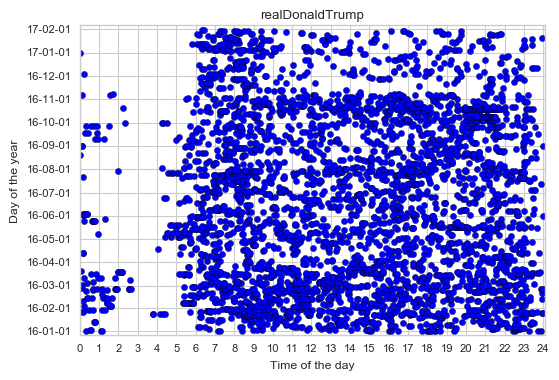

In [5]:
y_ls, x_ls = np.where(Y_data!=0)

start_date = datetime.datetime.strptime(filename.split('_')[1],'%Y-%m-%d')
end_date = datetime.datetime.strptime(filename.split('_')[2][:-2],'%Y-%m-%d')

diff = end_date - start_date
num_days = diff.days

minutes_per_day = 24*60
xticks = np.arange(0, minutes_per_day + 1, 60)
xlabels = np.arange(0, 25, 1)

yticks = []
ylabels = []
ytick = 0
yticks.append(ytick)
ylabels.append(start_date.strftime('%y-%m-%d'))

while(start_date.year != end_date.year or start_date.month != end_date.month):
    year, month= divmod(start_date.month+1, 12)
    if month == 0: 
        month = 12
        year = year -1
    next_month = datetime.datetime(start_date.year + year, month, 1)
    diff = next_month - start_date
    ytick += diff.days
    start_date = next_month
    yticks.append(ytick)
    ylabels.append(start_date.strftime('%y-%m-%d'))

plt.figure
plt.scatter(x_ls, y_ls)
plt.xticks(xticks, xlabels)
plt.yticks(yticks, ylabels)
plt.xlim(0, minutes_per_day + 5)
plt.ylim(-5, num_days + 5)
plt.xlabel('Time of the day')
plt.ylabel('Day of the year')
plt.title(username)
plt.show()

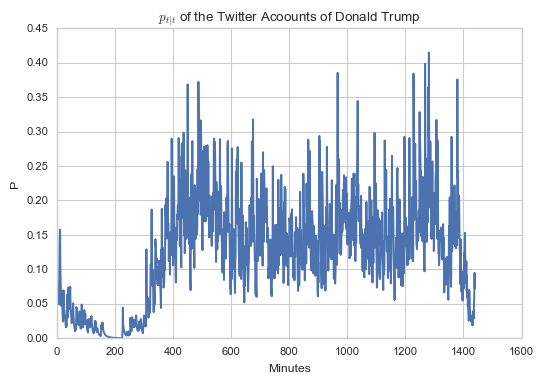

In [9]:
from nltk.probability import FreqDist
n = 0

y = np.zeros(1440)
for i in range(1440):
    for j in range(397):
        y[i] += Y_data[j,i]
        
HC = binary_filter(y, -4.5, 0, 1440, 0.15)
plt.plot(HC[0]*60)
plt.title('$p_{t|t}$ of the Twitter Acoounts of Donald Trump')
plt.xlabel('Minutes')
plt.ylabel('P')
plt.show()
        


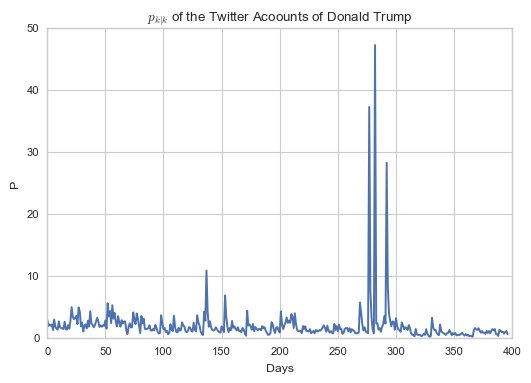

In [10]:
from nltk.probability import FreqDist
dist = FreqDist(y_ls)
np.sum(x_ls[:15])
count_x_ls_per_day = np.zeros(len(dist))
n = 0
for i in range(len(dist)):
    count_x_ls_per_day[i] = np.sum(x_ls[n:n+dist[i]])
    n += dist[i]

y = np.zeros(397)
for i in range(397):
    for j in range(1440):
        y[i] += Y_data[i,j]
        
DT = binary_filter(y, -4.5, 0, 397, 0.4)
plt.plot(DT[0]*60)
plt.title('$p_{k|k}$ of the Twitter Acoounts of Donald Trump')
plt.xlabel('Days')
plt.ylabel('P')
plt.show()

Loading data for HillaryClinton


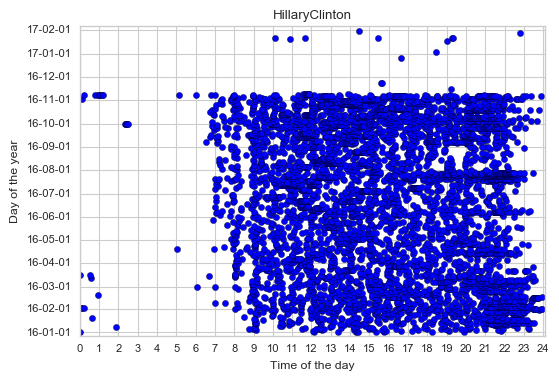

In [12]:
# load data
filename = 'HillaryClinton_2016-01-01_2017-02-01.p'
username = filename.split('_')[0]
print ('Loading data for', username)
Y_data = cPickle.load(open(filename,'rb'))
y_ls, x_ls = np.where(Y_data!=0)

start_date = datetime.datetime.strptime(filename.split('_')[1],'%Y-%m-%d')
end_date = datetime.datetime.strptime(filename.split('_')[2][:-2],'%Y-%m-%d')

diff = end_date - start_date
num_days = diff.days

minutes_per_day = 24*60
xticks = np.arange(0, minutes_per_day + 1, 60)
xlabels = np.arange(0, 25, 1)

yticks = []
ylabels = []
ytick = 0
yticks.append(ytick)
ylabels.append(start_date.strftime('%y-%m-%d'))

while(start_date.year != end_date.year or start_date.month != end_date.month):
    year, month= divmod(start_date.month+1, 12)
    if month == 0: 
        month = 12
        year = year -1
    next_month = datetime.datetime(start_date.year + year, month, 1)
    diff = next_month - start_date
    ytick += diff.days
    start_date = next_month
    yticks.append(ytick)
    ylabels.append(start_date.strftime('%y-%m-%d'))

plt.figure
plt.scatter(x_ls, y_ls)
plt.xticks(xticks, xlabels)
plt.yticks(yticks, ylabels)
plt.xlim(0, minutes_per_day + 5)
plt.ylim(-5, num_days + 5)
plt.xlabel('Time of the day')
plt.ylabel('Day of the year')
plt.title(username)
plt.show()



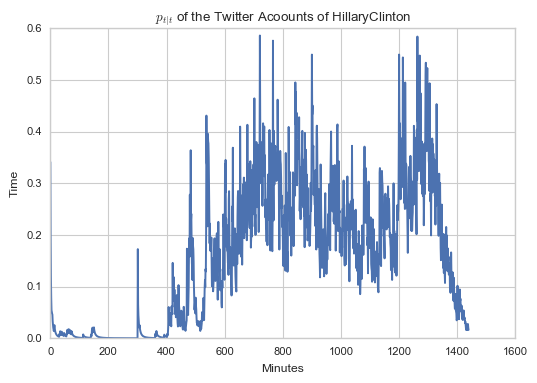

In [13]:
from nltk.probability import FreqDist
dist_x = FreqDist(x_ls)
count_y_ls_per_day = np.zeros(len(dist_x))
n = 0

y = np.zeros(1440)
for i in range(1440):
    for j in range(397):
        y[i] += Y_data[j,i]
        
HC = binary_filter(y, -4.5, 0, 1440, 0.15)
plt.plot(HC[0]*60)
plt.title('$p_{t|t}$ of the Twitter Acoounts of HillaryClinton')
plt.xlabel('Minutes')
plt.ylabel('Time')
plt.show()

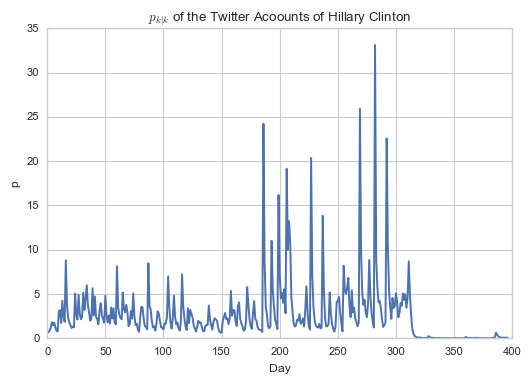

In [14]:
from nltk.probability import FreqDist
dist = FreqDist(y_ls)
count_x_ls_per_day = np.zeros(len(dist))
n = 0

y = np.zeros(397)
for i in range(397):
    for j in range(1440):
        y[i] += Y_data[i,j]

    
HC = binary_filter(y, -4.5, 0, 397, 0.4)
plt.plot(HC[0]*60)
plt.title('$p_{k|k}$ of the Twitter Acoounts of Hillary Clinton')
plt.xlabel('Day')
plt.ylabel('p')
plt.show()